In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data_dir = "/content/drive/MyDrive/AI and ML YEar3/week5/FruitinAmazon/train"

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size = (img_height, img_width),
    batch_size=batch_size,

  )

Found 90 files belonging to 6 classes.
Using 72 files for training.


In [8]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size = (img_height, img_width),
    batch_size=batch_size,

  )

Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [9]:
import os
# Define dataset path

# Get class names (subdirectories)
class_names = sorted(os.listdir(data_dir))
if not class_names:
  print("No class directories found in the train folder!")
else:
  print(f"Found {len(class_names)} classes: {class_names}")

Found 6 classes: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


In [10]:
from PIL import Image, UnidentifiedImageError

# Define the directory
class_names = os.listdir(data_dir)  # Get class names (folder names)

corrupted_images = []  # List to store corrupted images

for class_name in class_names:
    class_path = os.path.join(data_dir, class_name)

    if os.path.isdir(class_path):  # Ensure it's a directory
        images = os.listdir(class_path)  # List images in the class folder

        for img_name in images:
            img_path = os.path.join(class_path, img_name)

            try:
                with Image.open(img_path) as img:
                    img.verify()  # Verify image integrity
            except (IOError, UnidentifiedImageError):
                corrupted_images.append(img_path)

# Print results
if corrupted_images:
    print("\nCorrupted Images Found:")
    for img in corrupted_images:
        print(img)
else:
    print("\nNo corrupted images found.")


No corrupted images found.


In [11]:
class_names = os.listdir(data_dir)  # Get class names

class_counts = {}
for class_name in class_names:
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        class_counts[class_name] = len(images)  # Count images in each class

# Print Class Balance
print("\nClass Distribution:")
print("=" * 45)
print(f"{'Class Name':<25}{'Valid Image Count':>15}")
print("=" * 45)
for class_name, count in class_counts.items():
    print(f"{class_name:<25}{count:>15}")
print("=" * 45)




Class Distribution:
Class Name               Valid Image Count
guarana                               15
tucuma                                15
pupunha                               15
acai                                  15
graviola                              15
cupuacu                               15


In [12]:
global image_shape, label_shape  # Declare global variables

for images, labels in train_ds.take(1): # Take one batch
  print("Images shape:", images.shape)
  print("Labels shape:", labels.shape)



Images shape: (32, 180, 180, 3)
Labels shape: (32,)


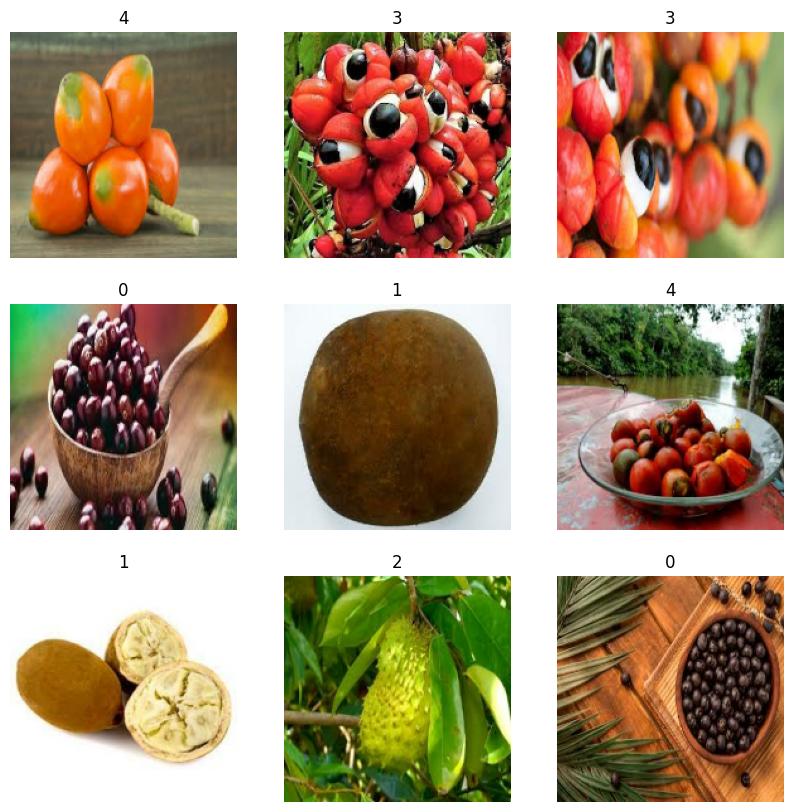

In [13]:
plt.figure(figsize=(10, 10))

# Take one batch of images from the dataset (train_ds)
for images, labels in train_ds.take(1):
    for i in range(9):  # Display first 9 images in a 3x3 grid
        ax = plt.subplot(3, 3, i + 1)  # Create 3x3 grid of subplots
        plt.imshow(np.array(images[i]).astype("uint8"))  # Convert image to uint8 for display
        plt.title(int(labels[i]))  # Display the label (class index)
        plt.axis("off")  # Turn off axis

plt.show()  # Sho

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.1),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    layers.RandomBrightness(0.2),  # Optional: for color shifts
], name="data_augmentation")


In [15]:
import math

train_batches = tf.data.experimental.cardinality(train_ds).numpy()
train_batch_size = 32  # whatever you used
train_samples = train_batches * train_batch_size
print(f"Train samples: {train_samples}")


Train samples: 96


In [17]:
model = keras.Sequential([
layers.Input(shape=(128, 128, 3)),*data_augmentation_layers, # Include augmentation before the model layers
layers.Conv2D(32, (3,3), activation="relu"),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(10, activation="softmax")
])
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(np.array(augmented_images[0]).astype("uint8"))
    plt.axis("off")

TypeError: Value after * must be an iterable, not Sequential

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the input shape without the batch size dimension
input_shape = (180, 180, 3)

# Define the model input
inputs = keras.Input(shape=input_shape)

# Define your data augmentation layers
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

# Apply data augmentation
x = data_augmentation(inputs)

# Rescaling layer to normalize image pixel values
x = layers.Rescaling(1./255)(x)

# Convolutional layers with pooling to extract features
x = layers.Conv2D(32, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D()(x)

# Add more convolutional layers for deeper feature extraction
x = layers.Conv2D(64, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D()(x)

# Flatten the output from the convolutional layers to pass to dense layers
x = layers.Flatten()(x)

# Add fully connected layers
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(10, activation="softmax")(x)  # Output layer for 10 classes

# Create the model
model = keras.Model(inputs=inputs, outputs=x)

# Print model summary to verify the architecture
model.summary()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Data Augmentation
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.1),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    layers.RandomBrightness(0.2),  # Optional: for color shifts
], name="data_augmentation")

# Define Input Layer
inputs = keras.Input(shape=(180,180,3))  # Ensure valid input shape

# Apply Data Augmentation & Rescaling
x = data_augmentation(inputs)
x = layers.Rescaling(1.0 / 255)(x)

# First Convolutional Block
x = layers.Conv2D(32, (3, 3), padding='same', activation=None)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

# Second Convolutional Block
x = layers.Conv2D(64, (3, 3), padding='same', activation=None)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

# Third Convolutional Block
x = layers.Conv2D(128, (3, 3), padding='same', activation=None)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

# Fourth Convolutional Block
x = layers.Conv2D(256, (3, 3), padding='same', activation=None)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

# Flatten the output
x = layers.Flatten()(x)

# Fully Connected Layers
x = layers.Dense(512, activation=None)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(0.1)(x)

x = layers.Dense(256, activation=None)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(0.3)(x)

x = layers.Dense(128, activation=None)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(0.1)(x)

x = layers.Dense(64, activation=None)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(0.3)(x)

# Output Layer (10 classes)
outputs = layers.Dense(10, activation='softmax')(x)

# Define the Model
model = keras.Model(inputs, outputs, name="CNN_Model")

# Compile the Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Show Model Summary
model.summary()


In [ ]:
epochs=40
history = model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=epochs
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(validation_ds)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

# Get the training loss and accuracy from the history object
train_loss = history.history['loss'][-1]  # Last training loss value
train_acc = history.history['accuracy'][-1]  # Last training accuracy value

print(f"Training Loss: {train_loss}")
print(f"Training Accuracy: {train_acc}")

In [ ]:
import math

train_batches = tf.data.experimental.cardinality(train_ds).numpy()
train_batch_size = 32  # whatever you used
train_samples = train_batches * train_batch_size
print(f"Train samples: {train_samples}")


In [ ]:
from tensorflow.keras.applications import VGG16

# Load the VGG16 model pre-trained on ImageNet, without the top classification layer
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(180, 180, 3))


In [ ]:
# Freeze the layers of the base model
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top layers
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(180, 180, 3))
# Unfreeze last 4 layers of VGG16
base_model.trainable = False
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Build the new model on top
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Use GAP instead of flatten
x = Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001))(x)
x = Dropout(0.5)(x)
outputs = Dense(6, activation='softmax')(x)  # 6 classes for your fruits
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model with a low learning rate
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# callbacks = [
#     EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
#     ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)
# ]

history = model.fit(train_ds, validation_data=validation_ds, epochs=20)
# history = model.fit(train_ds, validation_data=validation_ds, epochs=20, callbacks=callbacks)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Show the plots
plt.show()



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitor validation accuracy
    patience=3,              # Stop after 3 epochs if there's no improvement
    restore_best_weights=True  # Restore the best weights based on validation accuracy
)

# Train the model with EarlyStopping
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=10,
    callbacks=[early_stopping]  # Pass the early stopping callback
)



In [ ]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(validation_ds)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # If using a split from a single directory
)


In [ ]:
layers.Dropout(0.5)


In [ ]:
layers.Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))


In [ ]:
# Assuming train_ds and val_ds are prepared datasets
EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(train_ds, validation_data=validation_ds, epochs=10)


In [ ]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(validation_ds)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

# Get the training loss and accuracy from the history object
train_loss = history.history['loss'][-1]  # Last training loss value
train_acc = history.history['accuracy'][-1]  # Last training accuracy value

print(f"Training Loss: {train_loss}")
print(f"Training Accuracy: {train_acc}")


In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Show the plots
plt.show()


In [ ]:
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

# Define the model with L2 regularization and convolutional layers
from tensorflow.keras import regularizers

# Add dropout and L2 regularization to your model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),  # Dropout rate: 30%
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # assuming 10 output classes
])

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for 50 epochs and save the history
history = model.fit(train_ds, validation_data=validation_ds, epochs=50)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Show the plots
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
import numpy as np

# Assuming you have your dataset loaded in `train_images`, `train_labels`, `val_images`, `val_labels`

# Define the data augmentation pipeline
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator on your training data
datagen.fit(train_images)

# Add dropout and L2 regularization to your model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),  # Dropout rate: 30%
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # Assuming 10 output classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping to monitor validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Set up a learning rate scheduler to reduce learning rate when the validation loss plateaus
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Use k-fold cross-validation to assess the model's performance
X = np.array(train_images)
y = np.array(train_labels)

kfold = KFold(n_splits=5, shuffle=True)

# Store the history for each fold
histories = []

for train_index, val_index in kfold.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Fit the model for this fold
    history = model.fit(
        datagen.flow(X_train, y_train, batch_size=32),  # Data augmentation
        epochs=50,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping, lr_scheduler]
    )
    histories.append(history)

# Evaluate the model performance on validation set
final_history = histories[-1]  # Use the history from the last fold (or choose your strategy)
print(f"Final model validation accuracy: {final_history.history['val_accuracy'][-1]}")
